## Imports

In [13]:
from utils import initialize_model, train_stepLR, train_cosine, perform_train
import gym
import pandas as pd
import matplotlib.pyplot as plt

In [14]:

all_env = list(gym.envs.registry.keys())

print('Total Environments in Gym version {} : {}'.format(gym.__version__,len(all_env)))

Total Environments in Gym version 0.25.2 : 996


## Defining hyperparameters

In [15]:
#define environment
env = gym.make("AssaultDeterministic-v4", render_mode="rgb_array")

obs = env.reset()

# Inspect the observation
print("Observation shape:", obs.shape)
print("Observation dtype:", obs.dtype)
#print("Observation example:\n", obs)




Observation shape: (210, 160, 3)
Observation dtype: uint8


In [ ]:
# model params
eps_mem_size = 10
num_lstm_hidden_layers = 8
batch_size = 512
ep_window_size = 10 # for LSTM Module, how many episodes are we remembering?
l_rate = 0.0005
epsilon_decay = 0.9999


In [ ]:
epMem, model, agent = initialize_model(eps_mem_size, num_lstm_hidden_layers, batch_size, ep_window_size, l_rate, epsilon_decay)

# train params
SHOOTING_FACTOR=0.2
SHOOT_WINDOW=5
num_of_episodes = 50
time_step_size = 10000
window_size = 3
show_gifs = True
gif_show_frequency = 50


## Case - 1

### Assault-v5 for StepLR, With Modified Reward Function formulation for POMDP

Episode: 1, Number of steps: 670, Total Reward: 210.0


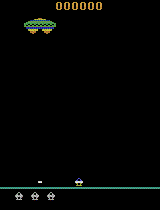

Episode: 2, Number of steps: 702, Total Reward: 252.0


KeyboardInterrupt: 

In [7]:
csvfile_name = 'case_1.csv'

train_stepLR(env, agent, epMem, epsilon_decay, num_of_episodes, time_step_size, window_size, show_gifs, gif_show_frequency, csvfile_name)

df = pd.read_csv('/home/pdutta/RL/final_project/case_1.csv', header=None)
WINDOW_FOR_MOVING_AVG = 40
index_vector = range(num_of_episodes)

plt.figure(figsize=(10,5))

df["evm_avg"] = df[0].ewm(span=40).mean() # calculate the exponentially weighted moving average
plt.title("Performance Score Variation over Episodes : Assault-v5")
plt.plot(index_vector, df[0][:num_of_episodes], label="Reward")
plt.plot(index_vector, df["evm_avg"][:num_of_episodes], label="Moving Average of Reward")
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.legend()
plt.show()

## Case 2

#### Cosine Annealing With Warm Restarts, With Modified Reward Function

Episode: 1, Number of steps: 577, Total Reward: 252.00


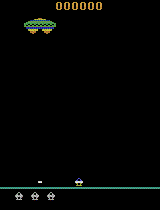

Episode: 2, Number of steps: 510, Total Reward: 231.00
Episode: 3, Number of steps: 503, Total Reward: 189.00
Episode: 4, Number of steps: 535, Total Reward: 189.00
Episode: 5, Number of steps: 623, Total Reward: 294.00
Episode: 6, Number of steps: 647, Total Reward: 273.00
Episode: 7, Number of steps: 711, Total Reward: 315.00
Episode: 8, Number of steps: 663, Total Reward: 294.00
Episode: 9, Number of steps: 647, Total Reward: 210.00
Episode: 10, Number of steps: 479, Total Reward: 189.00
Episode: 11, Number of steps: 351, Total Reward: 168.00
Episode: 12, Number of steps: 671, Total Reward: 315.00
Episode: 13, Number of steps: 551, Total Reward: 210.00
Episode: 14, Number of steps: 479, Total Reward: 210.00
Episode: 15, Number of steps: 719, Total Reward: 168.00
Episode: 16, Number of steps: 742, Total Reward: 273.00
Episode: 17, Number of steps: 606, Total Reward: 294.00
Episode: 18, Number of steps: 622, Total Reward: 189.00
Episode: 19, Number of steps: 742, Total Reward: 336.00


FileNotFoundError: [Errno 2] No such file or directory: '/home/pdutta/RL/final_project/case_2.csv'

In [4]:
csvfile_name = 'case_2.csv'

train_cosine(env, agent, epMem, epsilon_decay, num_of_episodes, time_step_size, window_size, show_gifs, gif_show_frequency, csvfile_name)

df = pd.read_csv('/home/pdutta/RL/final_project/case_2.csv', header=None)
WINDOW_FOR_MOVING_AVG = 40
index_vector = range(num_of_episodes)

plt.figure(figsize=(10,5))

df["evm_avg"] = df[0].ewm(span=40).mean() # calculate the exponentially weighted moving average
plt.title("Performance Score Variation over Episodes : Assault-v5")
plt.plot(index_vector, df[0][:num_of_episodes], label="Reward")
plt.plot(index_vector, df["evm_avg"][:num_of_episodes], label="Moving Average of Reward")
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.legend()
plt.show()

## Case 3

#### Vanilla DRQN with vanilla reward function

In [ ]:
csvfile_name = 'case_3.csv'

epMem, model, agent = initialize_model(eps_mem_size, num_lstm_hidden_layers, batch_size, ep_window_size, l_rate, epsilon_decay,vanilla=True)

train_stepLR(env, agent, epMem, epsilon_decay, num_of_episodes, time_step_size, window_size, show_gifs, gif_show_frequency, csvfile_name)

df = pd.read_csv('/home/pdutta/RL/final_project/case_3.csv', header=None)
WINDOW_FOR_MOVING_AVG = 40
index_vector = range(num_of_episodes)

plt.figure(figsize=(10,5))

df["evm_avg"] = df[0].ewm(span=40).mean() # calculate the exponentially weighted moving average
plt.title("Performance Score Variation over Episodes : Assault-v5")
plt.plot(index_vector, df[0][:num_of_episodes], label="Reward")
plt.plot(index_vector, df["evm_avg"][:num_of_episodes], label="Moving Average of Reward")
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.legend()
plt.show()

## Case 5 --> Bowling game with vanilla reward function DRQN

In [ ]:
#Game
env = gym.make("ALE/Bowling-v5", render_mode="rgb_array")


# model params
eps_mem_size = 10
num_lstm_hidden_layers = 8
batch_size = 512
ep_window_size = 3
l_rate = 0.005
epsilon_decay = 0.9

epMem, model, agent = initialize_model(eps_mem_size, num_lstm_hidden_layers, batch_size, ep_window_size, l_rate, epsilon_decay,vanilla=True)

# train params
SHOOTING_FACTOR=0.2
SHOOT_WINDOW=5
num_of_episodes = 200
time_step_size = 10000
window_size = 3
show_gifs = True
gif_show_frequency = 10
csvfile_name = 'bowling.csv'

perform_train(env, agent, epMem, epsilon_decay, num_of_episodes, time_step_size, window_size, show_gifs, gif_show_frequency, csvfile_name)


bf = pd.read_csv('./bowling.csv', header=None)
plt.figure(figsize=(10,5))
NUMBER_OF_EPISODE_BOUND = 40
WINDOW_FOR_MOVING_AVG = 2
index_vector = range(NUMBER_OF_EPISODE_BOUND)

bf["evm_avg"] = bf[0].ewm(span=30).mean() # calculate the exponentially weighted moving average
plt.title("Performance Variation Over Episodes : Bowling-v5")
plt.plot(index_vector, bf[0][:NUMBER_OF_EPISODE_BOUND], label="Reward")
plt.plot(index_vector, bf["evm_avg"][:NUMBER_OF_EPISODE_BOUND], label="Moving Average of Reward")
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.legend()
plt.show()

In [ ]:
import sys
from typing import Dict, List, Tuple

import gym
import collections
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.tensorboard import SummaryWriter

from pompd import seed_torch, Q_net, EpisodeMemory,EpisodeBuffer, save_model, train


# Env parameters
model_name = "DRQN_POMDP_Random"
env_name = "CartPole-v1"
seed = 1
exp_num = 'SEED'+'_'+str(seed)

# Set gym environment
env = gym.make(env_name)

if torch.cuda.is_available():
    device = torch.device("cuda")

# Set the seed
np.random.seed(seed)
random.seed(seed)
seed_torch(seed)
env.seed(seed)

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/'+env_name+"_"+model_name+"_"+exp_num)

# Set parameters
batch_size = 8
learning_rate = 1e-3
buffer_len = int(100000)
min_epi_num = 20 # Start moment to train the Q network
episodes = 650
print_per_iter = 20
target_update_period = 4
eps_start = 0.1
eps_end = 0.001
eps_decay = 0.995
tau = 1e-2
max_step = 2000

# DRQN param
random_update = True# If you want to do random update instead of sequential update
lookup_step = 20 # If you want to do random update instead of sequential update
max_epi_len = 100 
max_epi_step = max_step



# Create Q functions
Q = Q_net(state_space=env.observation_space.shape[0]-2, 
            action_space=env.action_space.n).to(device)
Q_target = Q_net(state_space=env.observation_space.shape[0]-2, 
                    action_space=env.action_space.n).to(device)

Q_target.load_state_dict(Q.state_dict())

# Set optimizer
score = 0
score_sum = 0
optimizer = optim.Adam(Q.parameters(), lr=learning_rate)

epsilon = eps_start

episode_memory = EpisodeMemory(random_update=random_update, 
                                max_epi_num=100, max_epi_len=600, 
                                batch_size=batch_size, 
                                lookup_step=lookup_step)

# Train
for i in range(episodes):
    s = env.reset()
    obs = s[::2] # Use only Position of Cart and Pole
    done = False
    
    episode_record = EpisodeBuffer()
    h, c = Q.init_hidden_state(batch_size=batch_size, training=False)

    for t in range(max_step):

        # Get action
        a, h, c = Q.sample_action(torch.from_numpy(obs).float().to(device).unsqueeze(0).unsqueeze(0), 
                                            h.to(device), c.to(device),
                                            epsilon)

        # Do action
        s_prime, r, done, _ = env.step(a)
        obs_prime = s_prime[::2]

        # make data
        done_mask = 0.0 if done else 1.0

        episode_record.put([obs, a, r/100.0, obs_prime, done_mask])

        obs = obs_prime
        
        score += r
        score_sum += r

        if len(episode_memory) >= min_epi_num:
            train(Q, Q_target, episode_memory, device, 
                    optimizer=optimizer,
                    batch_size=batch_size,
                    learning_rate=learning_rate)

            if (t+1) % target_update_period == 0:
                # Q_target.load_state_dict(Q.state_dict()) <- navie update
                for target_param, local_param in zip(Q_target.parameters(), Q.parameters()): # <- soft update
                        target_param.data.copy_(tau*local_param.data + (1.0 - tau)*target_param.data)
            
        if done:
            break
    
    episode_memory.put(episode_record)
    
    epsilon = max(eps_end, epsilon * eps_decay) #Linear annealing

    if i % print_per_iter == 0 and i!=0:
        print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                        i, score_sum/print_per_iter, len(episode_memory), epsilon*100))
        score_sum=0.0
        save_model(Q, model_name+"_"+exp_num+'.pth')

    # Log the reward
    writer.add_scalar('Rewards per episodes', score, i)
    score = 0
    
writer.close()
env.close()